In [17]:
import numpy as np
import tables
import matplotlib.pyplot as plt
import os
import pickle
import json
from utils import *
import seaborn as sns

In [18]:
f_dir = "test_weight_cost_model"
# rep = 0
# lr = 0.02
all_rep = range(1)
all_wcosts = [0.0002, 0.0004, 0.0008, 0.0016]

m1_id = [0, 1, 4, 5]
m2_id = [2, 3, 6, 7]
m_name = ['ME', 'TE', 'MI', 'TI']
m_idx = get_module_idx()


In [19]:
def plot_w_distr(w, from_ids, to_ids, from_m1=True):
    fig, axes = plt.subplots(len(from_ids), len(to_ids), sharex=True, sharey=True, figsize=(13, 16))
    for j in range(len(from_ids)):
        for i in range(len(to_ids)):
            f_rng = range(m_idx[from_ids[j]][0], m_idx[from_ids[j]][1])
            t_rng = range(m_idx[to_ids[i]][0], m_idx[to_ids[i]][1])
            temp_w = w[f_rng, :][:, t_rng]
            temp_w = temp_w[temp_w != 0].flatten()
            sns.histplot(temp_w, ax=axes[j][i], bins=20)
            from_n = m_name[j]
            if from_m1:
                axes[j][i].set_title('M1 %s to M2 %s \n # conn = %d \n mean weight = %.3f' %(from_n, m_name[i], len(temp_w), np.mean(temp_w)))
            else:
                axes[j][i].set_title('M2 %s to M1 %s \n # conn = %d \n mean weight = %.3f' %(from_n, m_name[i], len(temp_w), np.mean(temp_w)))
            axes[j][i].axvline(x=0, color='r')
            axes[j][i].axvline(x=np.mean(temp_w), color='g')
            axes[j][i].set_title
            plt.tight_layout()

In [20]:
if not os.path.exists(os.path.join(f_dir, "trained_weight_distr")):
    os.makedirs(os.path.join(f_dir, "trained_weight_distr"))

KeyboardInterrupt: 

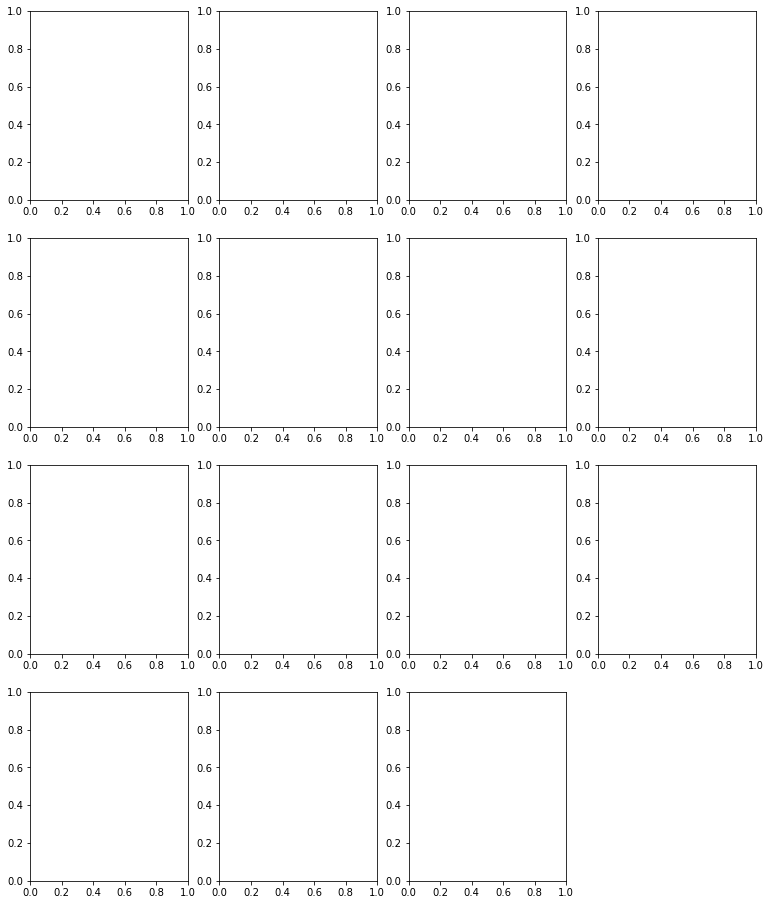

In [22]:

for wcost in all_wcosts:
    for rep in all_rep:
        with open(os.path.join(f_dir, "init_weight_%d_wcost%.4f.pth" % (rep, wcost)), "rb") as f:
            init_weights = np.load(f, allow_pickle=True)
        init_weights = init_weights.item()

        with open(os.path.join(f_dir, "weight_%d_wcost%.4f.pth" % (rep, wcost)), "rb") as f:
            trained_weights = np.load(f, allow_pickle=True)
        trained_weights = trained_weights.item()
        trained_w_rnn = trained_weights['w_rnn0'] * trained_weights['rnn_mask_init']

        # M1 -> M2
        plot_w_distr(trained_w_rnn, m1_id, m2_id)
        plt.savefig(os.path.join(f_dir,'trained_weight_distr', 'M1_to_M2_wcost%.4f.png'%(wcost)))
        plt.close()

        # M2 -> M1
        plot_w_distr(trained_w_rnn, m2_id, m1_id,False)
        plt.savefig(os.path.join(f_dir, 'trained_weight_distr', 'M2_to_M1_wcost%.4f.png'%(wcost)))
        plt.close()

<AxesSubplot:>

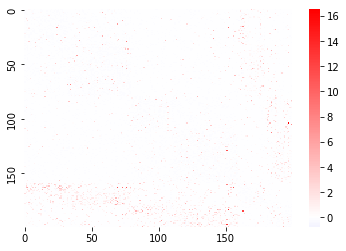

In [ ]:

# rep = 0
# with open(os.path.join(f_dir, "weight_%d_lr%f.pth" % (rep, lr)), "rb") as f:
#         trained_weights = np.load(f, allow_pickle=True)
# trained_weights = trained_weights.item()
# trained_w_rnn = trained_weights['w_rnn0'] * trained_weights['rnn_mask_init']

# sns.heatmap(trained_w_rnn, cmap ='bwr', center=0, xticklabels=50, yticklabels=50)